In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Harris角点检测
- 当检测区域向四周移动时，若无变化，说明这既不是角点也不是边缘（图1）
- 当检测区域向左右移动有变化，上下移动无变化（或者反过来）时，说明这是边缘（图2）
- 当检测区域向四周移动均有变化，说明这是角点（图3）
![image-20240816193038930](https://cdn.jsdelivr.net/gh/GottenZZP/pictures@main/blogs/image-20240816193038930.png)
- Harris角点具有旋转不变性，但是不具有尺度不变性

In [2]:
img = cv2.imread('../template/images/image.jpg')

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris角点检测
blockSize = 2
ksize = 3
k = 0.04
dst = cv2.cornerHarris(gray, blockSize, ksize, k)

# Harris角点显示
img[dst>0.01*dst.max()] = [0, 0, 255]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: module 'cv2' has no attribute 'imread'

## Sift特征检测
- SIFT（Scale-Invariant Feature Transform）是一种用于检测和描述图像局部特征的算法
- 它具备旋转不变性和尺度不变性

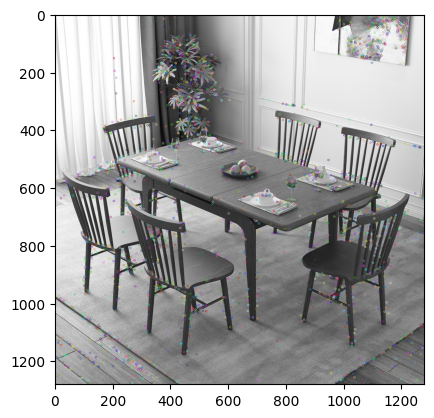

In [9]:
img = cv2.imread('../template/images/image.jpg')
# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# SIFT特征检测
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
# SIFT特征显示
cv2.drawKeypoints(gray, kp, img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 关键点与描述子
- 关键点是图像中的局部最大值点，描述子是关键点周围的局部特征
- 关键点的位置、尺度、方向、大小等信息
- 描述子记录了关键点周围对其有贡献的像素点的一组向量值，不受仿射变换、光照变换的影响

## SIFT计算描述子

[[  3.   1.   0. ...   2.   1.   4.]
 [ 11.   4.   2. ...   2.   0.  14.]
 [  0.   0.   0. ...   0.   0.   4.]
 ...
 [  0.   0. 114. ...   0.   0.   1.]
 [ 12.   2.   0. ...   2.   0.  10.]
 [  0.   1.  19. ...   0.   3.   3.]]


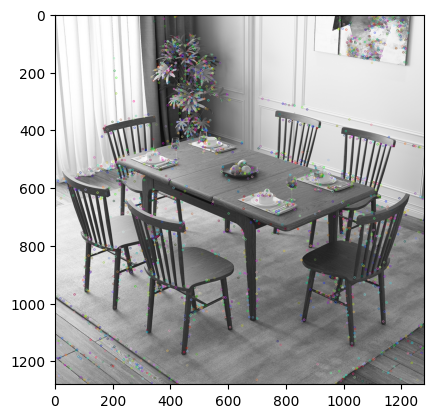

In [7]:
img = cv2.imread('../template/images/image.jpg')
# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# SIFT特征检测,计算描述子
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
# 输出描述子
print(des)
# SIFT特征显示
cv2.drawKeypoints(gray, kp, img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## SURF特征检测
- SURF（Speeded-Up Robust Features）是一种用于检测和描述图像局部特征的算法
- 它是SIFT的加速版本，具有更快的速度
- SURF是基于Hessian矩阵的检测方法

In [4]:
img = cv2.imread('../template/images/image.jpg')
# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# SURF特征检测
surf = cv2.SURF_create()
kp, des = surf.detectAndCompute(gray, None)
# SURF特征显示
cv2.drawKeypoints(gray, kp, img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

AttributeError: module 'cv2' has no attribute 'imread'

## ORB特征检测
- ORB（Oriented FAST and Rotated BRIEF）是一种用于检测和描述图像局部特征的算法
- 它是FAST关键点检测算法和BRIEF描述子算法的结合
- ORB是一种免费的、快速的、旋转不变的特征检测算法
- FAST是一种高速特征检测算法，BRIEF是一种高速特征描述子算法

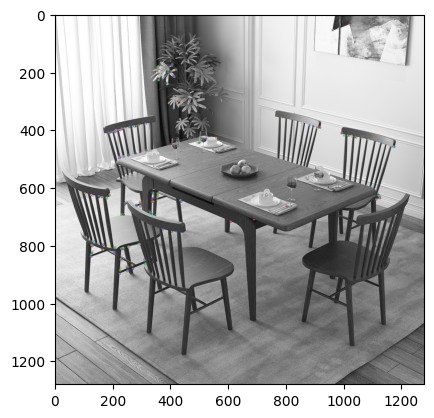

In [4]:
img = cv2.imread('../template/images/image.jpg')
# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ORB特征检测
orb = cv2.ORB_create()
kp, des = orb.detectAndCompute(gray, None)
# ORB特征显示
cv2.drawKeypoints(gray, kp, img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 特征匹配方法
## 暴力匹配
- 暴力匹配是最简单的特征匹配方法，它计算两个特征集合中所有特征之间的距离，然后选择距离最近的两个特征
- 暴力匹配的时间复杂度为O(N^2)

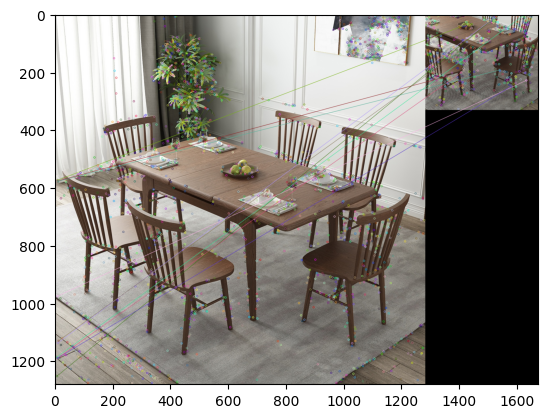

In [11]:
img1 = cv2.imread('../template/images/image.jpg')
img2 = cv2.imread('../template/images/image2.jpg')
# 灰度化
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# SIFT特征检测,计算描述子
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# 暴力匹配, 使用L1范数
bf = cv2.BFMatcher(cv2.NORM_L1)
match = bf.match(des1, des2)

# 绘制匹配结果
img3 = cv2.drawMatches(img1, kp1, img2, kp2, match[:10], None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

## FLANN匹配
- FLANN（Fast Library for Approximate Nearest Neighbors）是一种快速的最近邻搜索算法
- FLANN匹配是一种基于特征空间的最近邻搜索算法
- FLANN匹配的时间复杂度为O(log(N))
- FLANN匹配的精度比暴力匹配要低，但速度更快
- FLANN匹配适用于大规模数据集

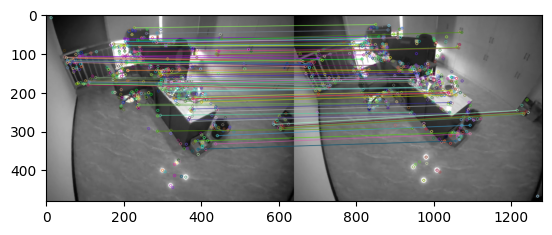

In [24]:
img1 = cv2.imread('../template/images/0006.jpg')
img2 = cv2.imread('../template/images/0008.jpg')
# 灰度化
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# SIFT特征检测,计算描述子
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# FLANN匹配
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
# 使用KNN匹配
match = flann.knnMatch(des1, des2, k=2)

good = []
for i, (m, n) in enumerate(match):
    if m.distance < 0.5 * n.distance:
        good.append(m)
        
# 绘制匹配结果
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good], None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

# 单应性矩阵
- 单应性矩阵是一种描述两幅图像之间的投影关系的矩阵
- 单应性矩阵可以用于图像拼接、图像配准、图像校正等
- 单应性矩阵是一个3x3的矩阵，它可以将一个图像中的点映射到另一个图像中的点

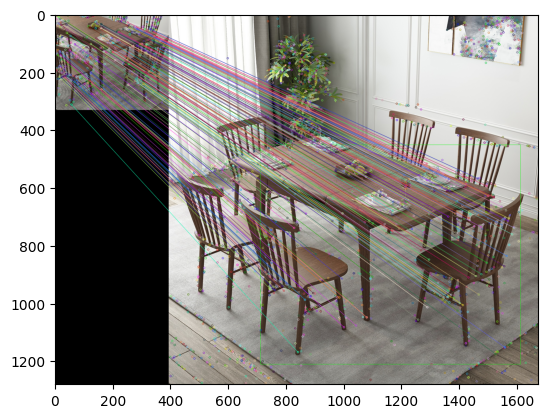

In [29]:
img1 = cv2.imread('../template/images/image2.jpg')
img2 = cv2.imread('../template/images/image.jpg')
# 灰度化
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# SIFT特征检测,计算描述子
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# FLANN匹配
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
# 使用KNN匹配
match = flann.knnMatch(des1, des2, k=2)

good = []
for i, (m, n) in enumerate(match):
    if m.distance < 0.5 * n.distance:
        good.append(m)

# 获取匹配点
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# 获取变换后的图像
h, w = img1.shape[:2]
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, H)
cv2.polylines(img2, [np.int32(dst)], True, (0, 255, 0))

# 绘制匹配结果
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good], None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()